In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")
print(df.shape)
print(df.columns)

(5171, 4)
Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
x = df["text"].values  
y = df["label_num"].values  
cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
bnb = BernoulliNB(binarize=0.0)
model = bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       732
           1       0.92      0.56      0.70       303

    accuracy                           0.86      1035
   macro avg       0.88      0.77      0.80      1035
weighted avg       0.87      0.86      0.84      1035



In [5]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8570048309178744
F1 Score: 0.8447675900171875


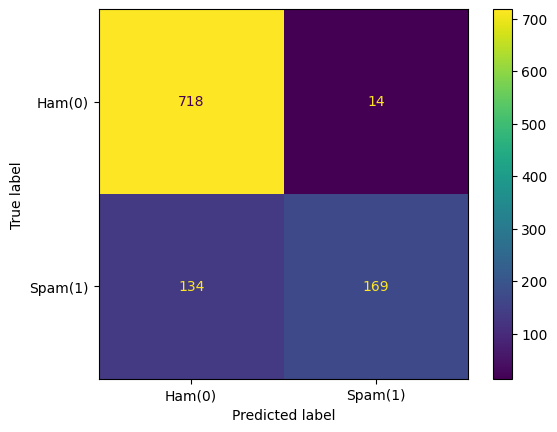

In [6]:
labels = ["Ham(0)", "Spam(1)"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()